Primeras filas del dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Estadísticas descriptivas:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


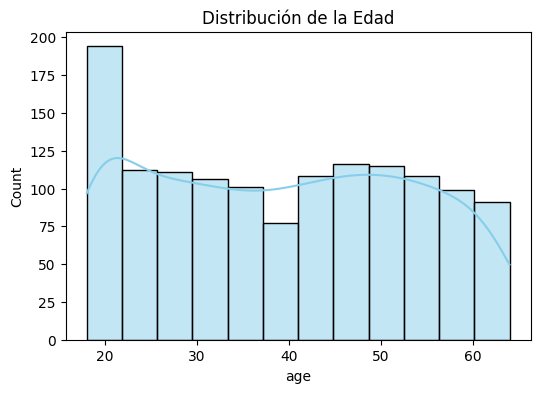

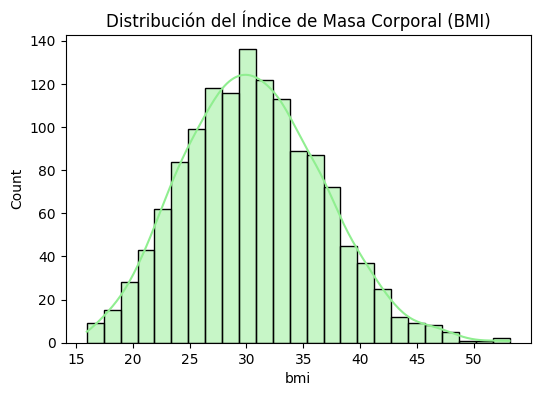

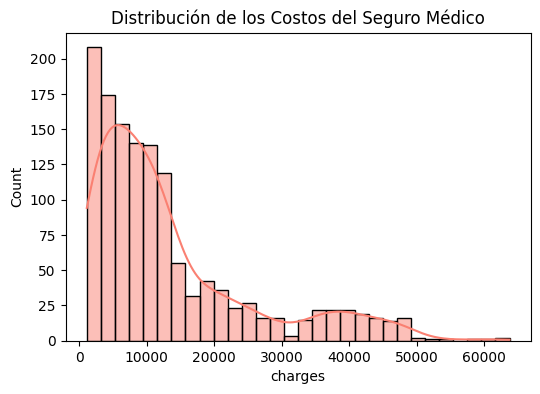

/tmp/ipython-input-3425564077.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette='pastel')
/tmp/ipython-input-3425564077.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=data, palette='pastel')
/tmp/ipython-input-3425564077.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=data, palette='pastel')


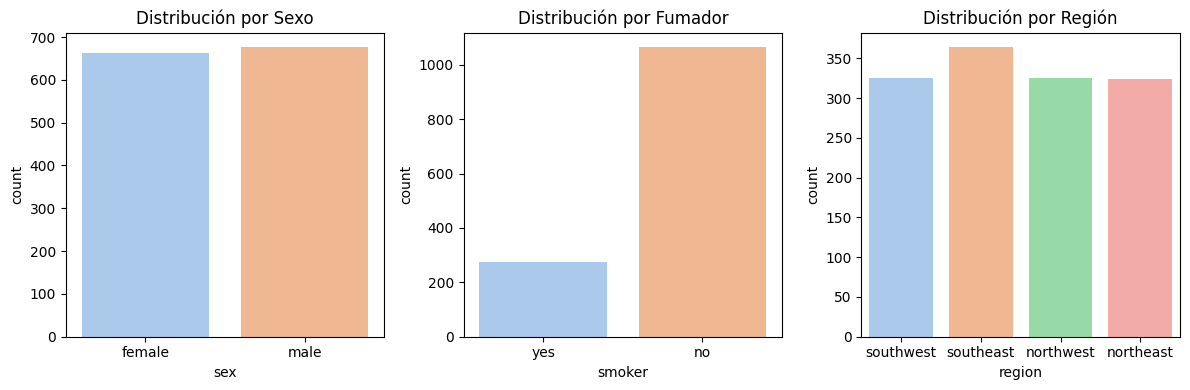

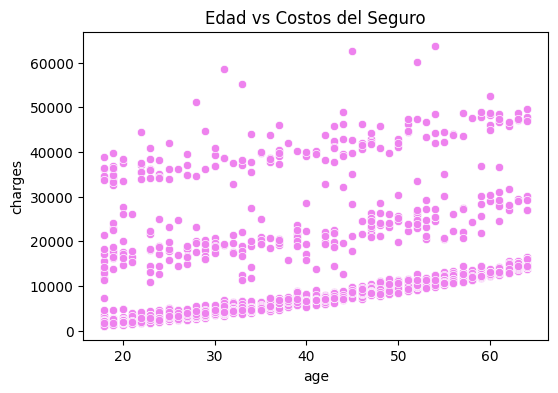

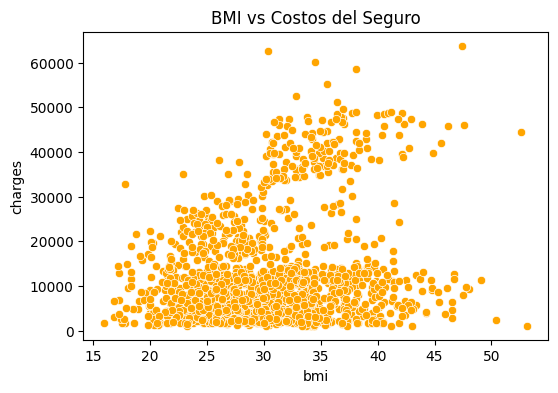

/tmp/ipython-input-3425564077.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')


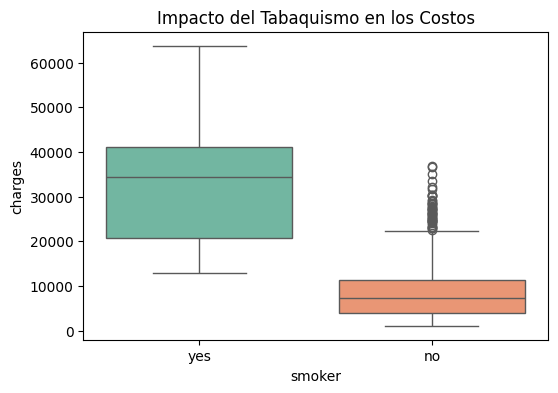

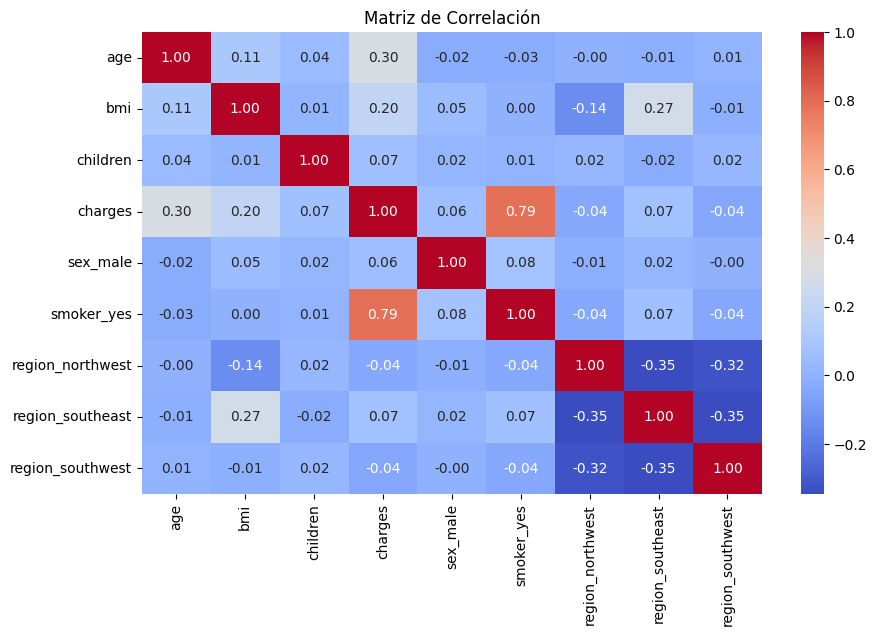

📊 Resultados comparativos de los modelos:



,Modelo,MAPE,MSE,RMSE
0,Regresión Lineal,0.468883,3.359692e+07,5796.284659
1,Ridge,0.471423,3.364504e+07,5800.434216
2,Lasso,0.469307,3.360551e+07,5797.025751
3,Random Forest,0.324924,2.094252e+07,4576.299916


/tmp/ipython-input-3425564077.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='RMSE', data=results_df, palette='viridis')


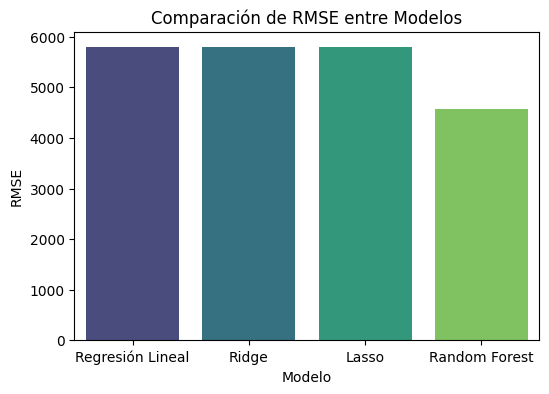


✅ Mejor modelo seleccionado: Random Forest
📁 Archivo 'error_analysis.csv' generado correctamente.


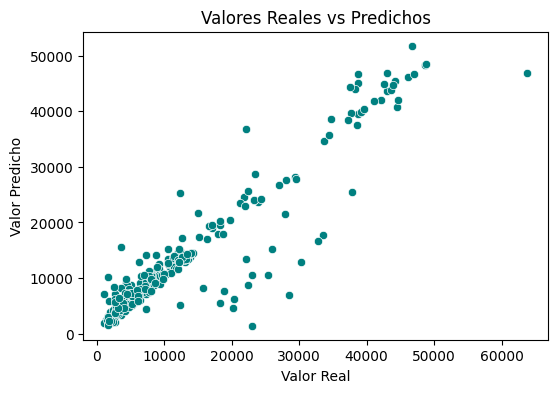

💾 Archivo 'best_model.pkl' guardado correctamente.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72e3197d6c7f27f26b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


💻 Accede al modelo en Hugging Face Space aquí:
https://huggingface.co/spaces/Amymarlene/SeguroMedico


In [26]:
# 🩺 ANÁLISIS DE COSTOS DE SEGURO MÉDICO – REGRESIÓN COMPLETA
# Autor: Amy Frías
# ============================================

# ======================================================
# 🔹 1. Importar librerías
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt

import gradio as gr

# ======================================================
# 🔹 2. Cargar dataset
# ======================================================
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print("Primeras filas del dataset:")
display(data.head())

# ======================================================
# 🔹 3. Análisis exploratorio de datos
# ======================================================
print("\nInformación general del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
display(data.describe())

# --- Histograma de edad ---
plt.figure(figsize=(6,4))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title("Distribución de la Edad")
plt.show()

# --- Histograma de BMI ---
plt.figure(figsize=(6,4))
sns.histplot(data['bmi'], kde=True, color='lightgreen')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.show()

# --- Histograma de cargos (charges) ---
plt.figure(figsize=(6,4))
sns.histplot(data['charges'], kde=True, color='salmon')
plt.title("Distribución de los Costos del Seguro Médico")
plt.show()

# --- Conteos categóricos ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(x='sex', data=data, palette='pastel')
plt.title("Distribución por Sexo")

plt.subplot(1,3,2)
sns.countplot(x='smoker', data=data, palette='pastel')
plt.title("Distribución por Fumador")

plt.subplot(1,3,3)
sns.countplot(x='region', data=data, palette='pastel')
plt.title("Distribución por Región")
plt.tight_layout()
plt.show()

# --- Relaciones entre variables ---
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=data, color='violet')
plt.title("Edad vs Costos del Seguro")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', data=data, color='orange')
plt.title("BMI vs Costos del Seguro")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title("Impacto del Tabaquismo en los Costos")
plt.show()

# --- Matriz de correlación ---
data_encoded = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# ======================================================
# 🔹 4. Preparar datos para el modelo
# ======================================================
X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================================
# 🔹 5. Entrenar modelos de regresión
# ======================================================
models = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mse)

    results.append({
        "Modelo": name,
        "MAPE": mape,
        "MSE": mse,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results)
print("📊 Resultados comparativos de los modelos:\n")
display(results_df)

# --- Gráfica comparativa de RMSE ---
plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='RMSE', data=results_df, palette='viridis')
plt.title("Comparación de RMSE entre Modelos")
plt.ylabel("RMSE")
plt.show()

# ======================================================
# 🔹 6. Seleccionar el mejor modelo
# ======================================================
best_model_name = results_df.sort_values("RMSE").iloc[0]["Modelo"]
best_model = models[best_model_name]

print(f"\n✅ Mejor modelo seleccionado: {best_model_name}")

# ======================================================
# 🔹 7. Análisis de error
# ======================================================
predictions = best_model.predict(X_test)
error_analysis = pd.DataFrame({
    "Real": y_test,
    "Predicho": predictions,
    "Error": abs(y_test - predictions)
})
error_analysis.to_csv("error_analysis.csv", index=False)
print("📁 Archivo 'error_analysis.csv' generado correctamente.")

# Visualizar algunos errores
plt.figure(figsize=(6,4))
sns.scatterplot(x=error_analysis["Real"], y=error_analysis["Predicho"], color="teal")
plt.title("Valores Reales vs Predichos")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.show()

# ======================================================
# 🔹 8. Guardar modelo
# ======================================================
joblib.dump(best_model, "best_model.pkl")
print("💾 Archivo 'best_model.pkl' guardado correctamente.")

# ======================================================
# 🔹 9. Interfaz con Gradio (dentro del notebook)
# ======================================================
def predecir_costos(edad, bmi, hijos, fumador, sexo, region):
    input_data = pd.DataFrame({
        "age": [edad],
        "bmi": [bmi],
        "children": [hijos],
        "sex_male": [1 if sexo == "Masculino" else 0],
        "smoker_yes": [1 if fumador == "Sí" else 0],
        "region_northwest": [1 if region == "Noroeste" else 0],
        "region_southeast": [1 if region == "Sureste" else 0],
        "region_southwest": [1 if region == "Suroeste" else 0]
    })
    prediccion = best_model.predict(input_data)[0]
    return f"💰 Costo estimado del seguro médico: ${prediccion:,.2f}"

demo = gr.Interface(
    fn=predecir_costos,
    inputs=[
        gr.Number(label="Edad"),
        gr.Number(label="Índice de masa corporal (BMI)"),
        gr.Number(label="Número de hijos"),
        gr.Radio(["Sí", "No"], label="¿Fuma?"),
        gr.Radio(["Masculino", "Femenino"], label="Sexo"),
        gr.Radio(["Noroeste", "Sureste", "Suroeste"], label="Región")
    ],
    outputs="text",
    title="🩺 Predicción de Costos de Seguro Médico",
    description="Introduce los datos del paciente para estimar el costo estimado según el modelo de regresión."
)

demo.launch(share=True, inline=True)

# Enlace permanente en Hugging Face
print("💻 Accede al modelo en Hugging Face Space aquí:")
print("https://huggingface.co/spaces/Amymarlene/SeguroMedico")